## Dataset and Problem Introduction

In this analysis, we explore word frequency in Herman Melville's <em>Moby Dick</em> and find the most common word.

<p>The notebook begins by scraping <em>Moby Dick</em> using the Python package <code>requests</code>. It then extracts words from the data using <code>BeautifulSoup</code>, and finally, it analyses the distribution of words using <code>Counter</code> and the Natural Language ToolKit (<code>nltk</code>).</p>

Data Source: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm
<br>Reference: https://www.datacamp.com/

In [11]:
# Importing requests, BeautifulSoup, nltk, and Counter
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter

## Requesting the Novel (HTML)
To analyse the novel, we fetch the HTML file of Moby Dick using the <code>request</code> package to make a <code>GET</code> request from https://www.gutenberg.org

In [12]:
# Getting the Moby Dick HTML  
r = requests.get('https://www.gutenberg.org/files/2701/2701-h/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[0:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#ffffff; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

## Obtaining text from the HTML
<p>After obtaining the HTML for <em>Moby Dick</em>, we <em>wrangle</em> the HTML to extract the text of the novel using the <code>BeautifulSoup</code> package.</p>

In [13]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html.parser")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[32000:34000])

er which the beech tree
        extended its branches.” —Darwin’s Voyage of a Naturalist.
      

        “‘Stern all!’ exclaimed the mate, as upon turning his head, he saw the
        distended jaws of a large Sperm Whale close to the head of the boat,
        threatening it with instant destruction;—‘Stern all, for your
        lives!’” —Wharton the Whale Killer.
      

        “So be cheery, my lads, let your hearts never fail, While the bold
        harpooneer is striking the whale!” —Nantucket Song.
      

     “Oh, the rare old Whale, mid storm and gale
     In his ocean home will be
     A giant in might, where might is right,
     And King of the boundless sea.”
      —Whale Song.





 





      CHAPTER 1. Loomings.
    

      Call me Ishmael. Some years ago—never mind how long precisely—having
      little or no money in my purse, and nothing particular to interest me on
      shore, I thought I would sail about a little and see the watery part of
      the world. It is 

## Extracting words
<p>Now that we have the selected text, we can count how many times each word appears using <code>nltk</code> – the Natural Language Toolkit. We start this process by first tokenizing the text to remove everything that isn't a word (whitespace, punctuation, etc.), and then split the text into a list of words.</p>

In [14]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')



# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:10]

['Moby',
 'Dick',
 'Or',
 'the',
 'Whale',
 'by',
 'Herman',
 'Melville',
 'body',
 'background']

## Standardising the text
<p>To ensure we don't double count words that include capital letters e.g. 'or' and 'Or', we standardise the words to all be lower case.</p>

In [15]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
words[:10]

['moby',
 'dick',
 'or',
 'the',
 'whale',
 'by',
 'herman',
 'melville',
 'body',
 'background']

## Removing 'stop' words
<p>In natural language processing analyses its common practice to remove common words that appear a lot in the English language e.g. 'the', 'of' and 'a'. For this analyse we use <code>nltk</code>'s included list of stop words, as well as Sklearn's list.</p>

In [16]:
# Get English stopwords and print some of them
#nltk.download('stopwords') <- download if first time using.

sw = nltk.corpus.stopwords.words('english')
sw[:10]

#####################################################################
#################### ADDING ADDITIONAL STOP WORDS# ##################
#####################################################################

# Import stopwords from sklearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# Add sklearn stopwords to words_sw
sw = set(sw + list(ENGLISH_STOP_WORDS))

# Initialize new list
words_ns = []


# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

In [17]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]


['moby', 'dick', 'whale', 'herman', 'melville']

## Most common word
<blockquote>
  <p>What are the most frequently occurring words in Herman Melville's novel Moby Dick and how often do they occur?</p>
</blockquote>
<p>We answer this question using <code>FreqDist</code>.</p>

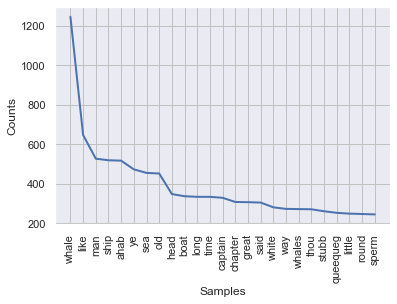

In [18]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

## Answer

<p>'whale' is the most common word in the novel (excluding stop words), and it occurs more than 1200 times.</p>

## Addition - Word Frequency Plotter Function

<p>To make use of the number of novels available on Project Gutenberg, we can use the following function to check word frequency on other available novels.</p>

In [19]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    
    # Make the request and check object type
    r = requests.get(url)
    
    # Extract HTML from Response object and print
    html = r.text
    
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    
    # Get the text out of the soup and print it
    text = soup.get_text()
    
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    
    # Create tokens
    tokens = tokenizer.tokenize(text)
    
    # Initialize new list
    words = []
    
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
        
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    
    # Initialize new list
    words_ns = []
    
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
            
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

## Function Test

* Dracula by Bram Stoker

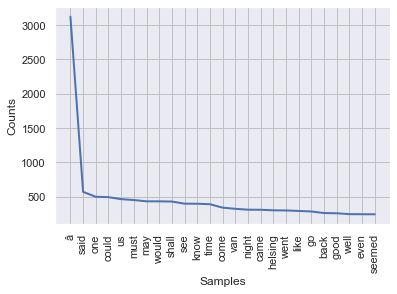

In [20]:
plot_word_freq('https://www.gutenberg.org/files/345/345-h/345-h.htm')